## Some algorithms take distance or similarity as a parameter. Here we demonstrate their effects on the solution space.

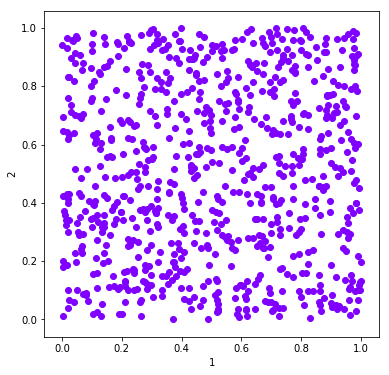

In [1]:
#%matplotlib inline
import numpy as np
import pandas as pd 
import openensembles as oe
import matplotlib.pyplot as plt
from sklearn import datasets


n_samples = 800
np.random.seed(0)

no_structure = np.random.rand(n_samples, 2), None
X,y = no_structure


np.random.seed(0)
n_samples = 300
#blobs = datasets.make_blobs(n_samples=n_samples, random_state=10,centers=5,cluster_std=2)
#X, y = blobs


df = pd.DataFrame(X)
d = oe.data(df, [1,2])




d.plot_data('parent')
   

#### Demonstration of varying distance for algorithm based on distance metrics

In [2]:
distances = ['euclidean', 'l1', 'manhattan', 'minkowski', 'l2', 'cosine', 'mahalanobis']


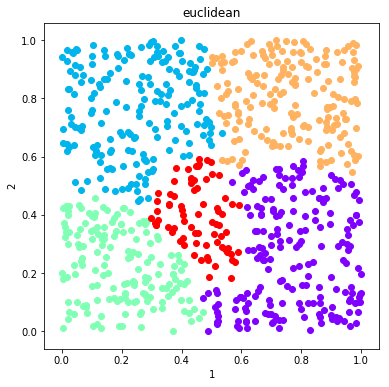

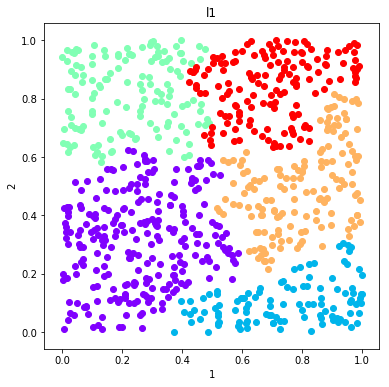

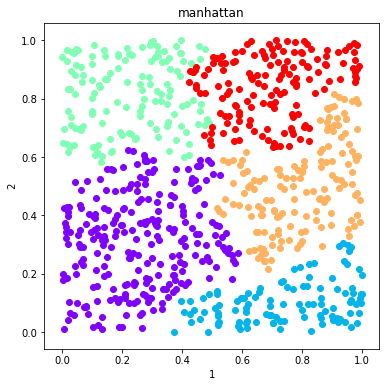

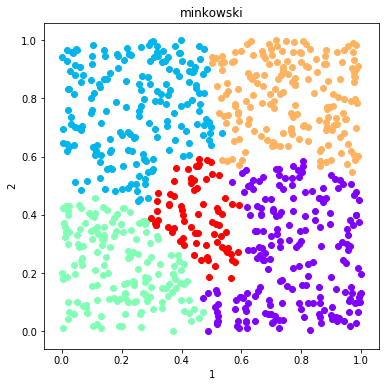

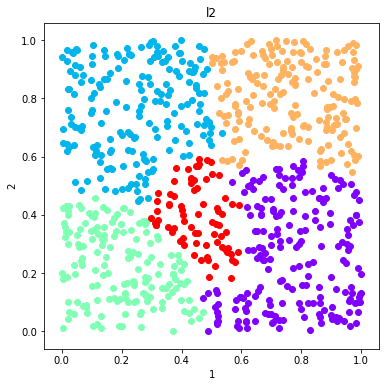

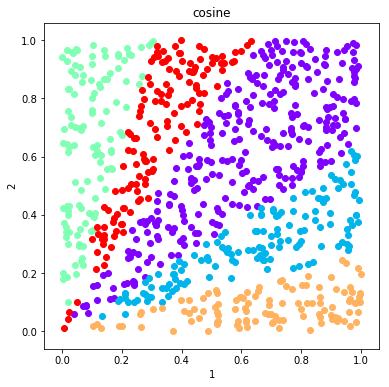

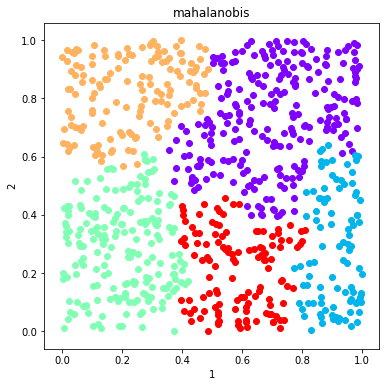

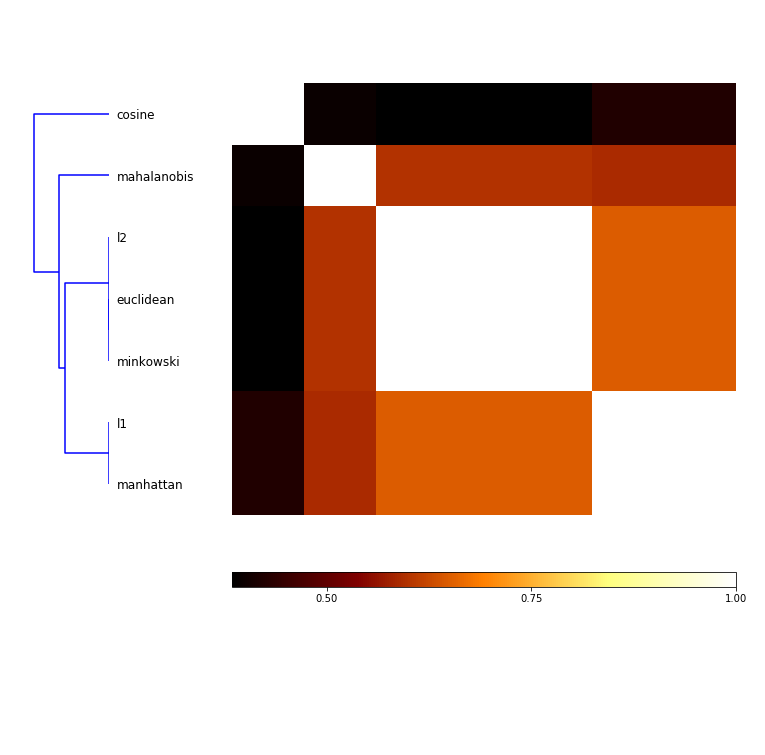

In [13]:
plt.close()

algorithm='agglomerative'
c = oe.cluster(d)
K=5
for distance in distances:
    out_name = distance
    c.cluster('parent', algorithm, out_name, K=K, Require_Unique=True, distance=distance, linkage='complete')

#PLOT
names = c.labels.keys()
figs =[]
fig = 0
for name in names:
    figH = d.plot_data('parent', fig_num=fig, class_labels=c.labels[name], title=name)
    plt.show()
    fig+=1

#COMPARE SOLUTIONS
mi = c.MI(MI_type='adjusted')
fig = mi.plot()
plt.show()

#### Demonstration of varying distance for algorithm based on affinity metrics

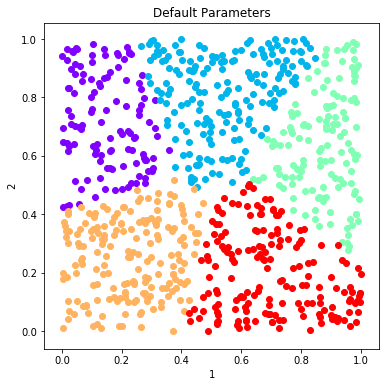

In [15]:
c = oe.cluster(d)
c.cluster('parent', 'spectral', 'spectral_default', K=5, Require_Unique=True)

plt.close()
d.plot_data('parent', class_labels=c.labels['spectral_default'], title='Default Parameters')

In [16]:
distances = ['euclidean', 'l1', 'manhattan', 'minkowski', 'l2', 'cosine', 'mahalanobis']


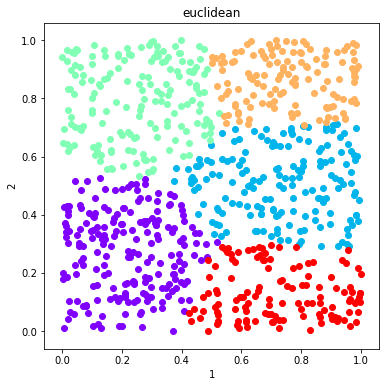

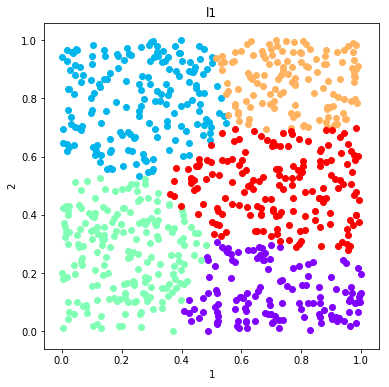

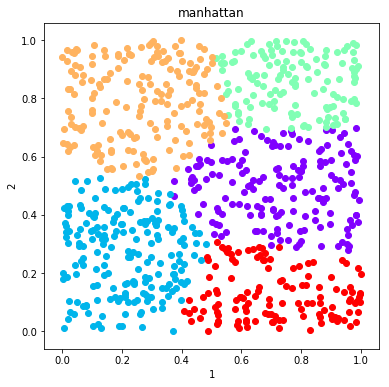

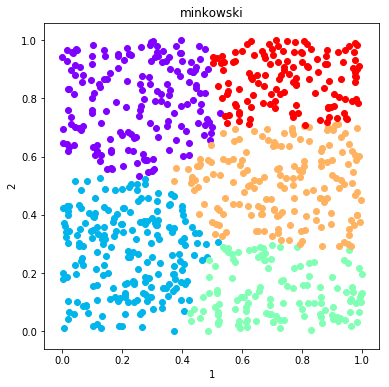

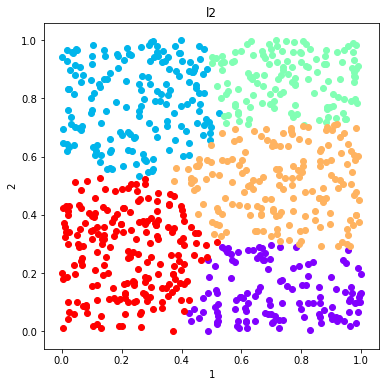

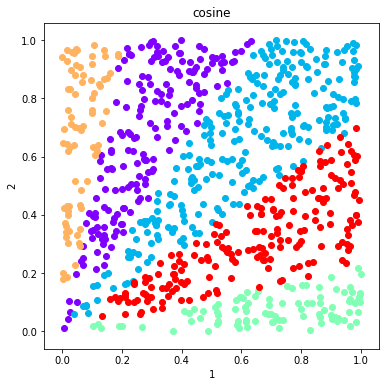

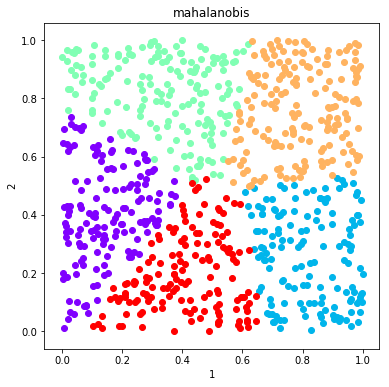

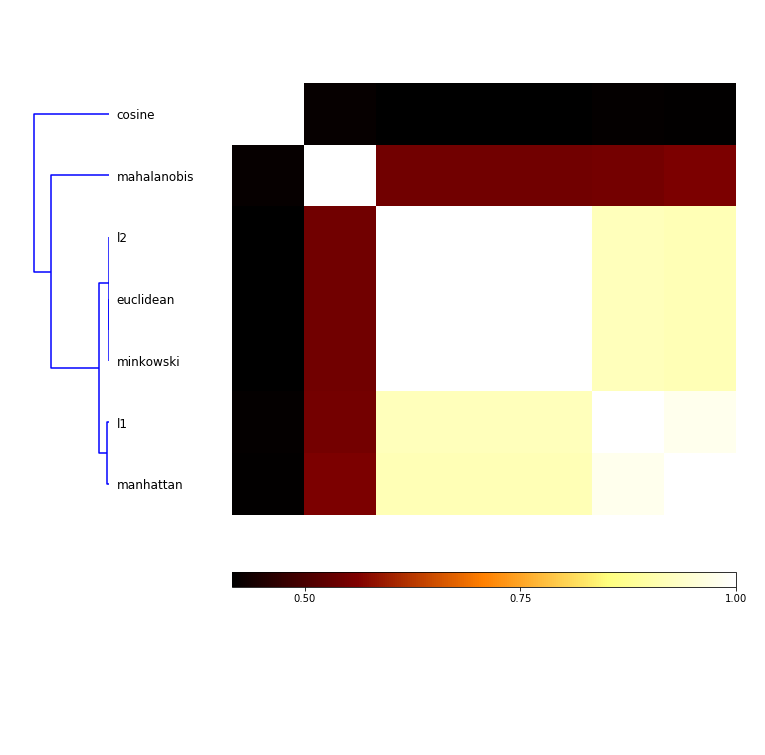

In [18]:

plt.close()

algorithm='spectral'
c = oe.cluster(d)
K=5
for distance in distances:
    out_name = distance
    c.cluster('parent', algorithm, out_name, K=K, Require_Unique=True, distance=distance)

#PLOT
names = c.labels.keys()
figs =[]
fig = 0
for name in names:
    d.plot_data('parent', fig_num=fig, class_labels=c.labels[name], title=name)
    plt.show()
    fig+=1

#COMPARE SOLUTIONS
mi = c.MI(MI_type='adjusted')
f = mi.plot()
plt.show()


### Call clustering with more control by using 'precomputed' distances and affinities.

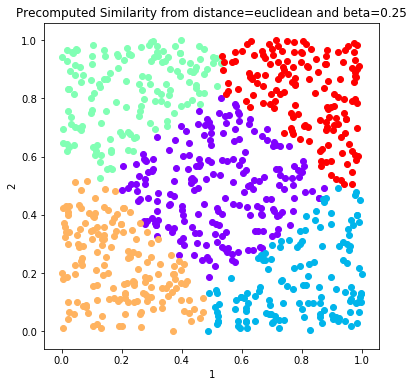

In [28]:
import clustering_algorithms as ca 
distance = 'euclidean'
D = ca.returnDistanceMatrix(d.D['parent'], distance)
beta=0.25
S = ca.convertDistanceToSimilarity(D, beta) # use a different weighting factor for conversion (default is 1)
algorithm='spectral'
K=5

out_name=distance
c = oe.cluster(d)
c.cluster('parent', algorithm, out_name, K=K, Require_Unique=True, affinity='precomputed', M=S)

#plt.close()
titleStr="Precomputed Similarity from distance=%s and beta=%0.2f"%(distance,beta)
d.plot_data('parent', class_labels=c.labels[out_name], title=titleStr)